In [199]:
import numpy as np
from matplotlib import pyplot
from tensorflow.keras.datasets import mnist

(trainX, trainY), (testX, testY) = mnist.load_data()

60000
3


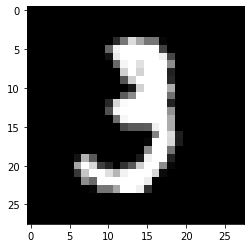

In [200]:
# ================ Tset ================
print(trainX.shape[0])

print(trainY[10])
pyplot.imshow(trainX[10] , cmap="gray")
pyplot.show()

In [158]:
# ================ Preparing Date ================
trainX = trainX.astype(float)/255
trainY = trainY.astype(float)/255

In [196]:
def randomFilter(w,h):
    f = np.random.randint(low = -1, high = 2 , size=(w,h))
    return f
    
f = randomFilter(3,3)
print(f)

[[ 1  1 -1]
 [ 0  1 -1]
 [ 1 -1  0]]


In [159]:
# Convolution and ReLU
def convolution (image, convFilter):

    # Image and filter dimensions
    imageH, imageW = image.shape
    filterH, filterW = convFilter.shape 

    # Conv Image
    convH = (imageH - filterH + 1)
    convW = (imageW - filterW + 1)
    convImage = np.ones((convH, convW) , dtype = float)

    i = j = 0           # Image row and column
    convI = convJ = 0   # Conv row and column

    while i + filterH <= imageH :
        convJ = 0
        j = 0
        while j + filterW <= imageW :
            convImage[convI][convJ] = np.sum(convFilter * image[i:(i+filterH) , j:(j+filterW)])
            j += 1
            convJ += 1
        i +=1
        convI += 1

    # ReLu
    convImage[convImage<0]=0

    return convImage

In [160]:
def maxPooling(image, filterSize, stride):

    imageH, imageW = image.shape

    outputH = int(((imageH - filterSize)/stride)+1)
    outputW = int(((imageW - filterSize)/stride)+1)

    outputImage = np.zeros((outputH, outputW))

    i = j = 0
    poolI = poolJ = 0

    while i + filterSize <= imageH :
        poolJ = 0
        j = 0
        while j + filterSize<= imageW :
            outputImage[poolI][poolJ] = np.amax(image[i:(i+filterSize) , j:(j+filterSize)])
            j += stride
            poolJ += 1
        i += stride
        poolI += 1

    return outputImage  

In [ ]:
def fullyConnected(image, y, Theta1, Theta2, lambda_, num_itr):
    


(26, 26)


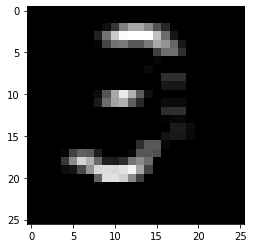

(13, 13)


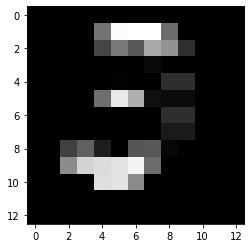

In [197]:
filt = np.array([[-1,-1,-1],[0,0,0],[1,1,1]])

# test convolution
conv = convolution(trainX[10] , filt)
print(conv.shape)
pyplot.imshow(conv , cmap="gray")
pyplot.show()

# test max pooling
out = maxPooling(conv , 2 , 2)
print(out.shape)
pyplot.imshow(out , cmap="gray")
pyplot.show()
